# Домашнее задание

В этом домашнем задании вам предстоит обучить модель классификации рукописных цифр на Tensorflow.

Важным дополненительным требованием будет сохранение чекпоинтов на ваш гугл диск (не переживайте ниже будут подсказки как это сделать). Это пригодится вам в дальнейшем при обучении более сложных моделей, на случай потери данных при неожиданном отключении Colab.

In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
print(tf.__version__)
from google.colab import drive
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

#tf.enable_eager_execution()

2.3.0


####Вспомогательный код

In [3]:
#@title 
def show_mnist(images, labels, predicted_labels=None):
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.gray)
        if predicted_labels is not None:
            title_obj = plt.title(f"Real: {labels[i]}. Pred: {predicted_labels[i]}")
            if labels[i] != predicted_labels[i]:
                plt.setp(title_obj, color='r')
        else:
            plt.title(f"Real label: {labels[i]}")

def show_progress(history: dict):
    plt.figure(figsize=(10, 5))
    ax1 = plt.subplot(1,2,1)    
    plt.plot(history["accuracy"],label='train accuracy')
    plt.plot(history["val_accuracy"], label='test accuracy')
    ax2 = plt.subplot(1,2,2)
    plt.plot(history["loss"],label='train_loss')
    plt.plot(history["val_loss"],label='test_loss')
    
    ax1.legend(loc='best')
    ax2.legend(loc='best')
    plt.grid()
    plt.tight_layout()
    plt.show()

## Загрузка данных

11493376/11490434 [==============================] - 0s 0us/step


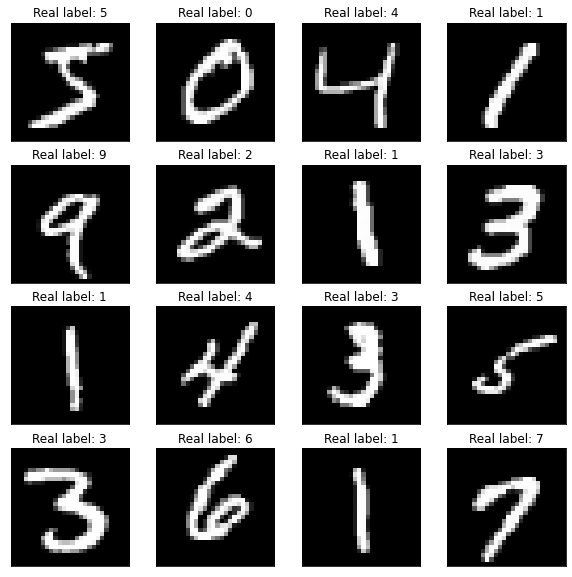

In [4]:
(Xt, Yt), (Xv, Yv) = tf.keras.datasets.mnist.load_data()
Xt, Xv = Xt / 255.0, Xv / 255.0

show_mnist(Xt, Yt)
Xt = Xt.reshape((-1, 28*28)) # вытянули каждую картинку в вектор
Xv = Xv.reshape((-1, 28*28))


In [5]:
# прикрепим ваш гугл диск к виртуальной машине
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
# Путь до вашего гугл диска скорее всего выглядит так: /content/drive/My Drive/
# если эта клетка вызывает ошибку, 
# измените путь согласно ! ls "/content/drive/"

path = Path("/content/drive/My Drive/models/model_mnist")
path.mkdir(exist_ok=True, parents=True) # папка создается на вашем гугл диске. вместе с "родителями"
assert path.exists()
cpt_filename = "best_checkpoint.hdf5"  
cpt_path =str(path / cpt_filename)
# После выполнения этой клетки, в вашем гугл диске должна создаться папка: Skillbox/model_1
# убедитесь в этом

А весь код ниже вы реализуете самостоятельно! Вы уже к этому готовы :)
Требования к модели:
1. Точность на тестовой части выборки >96%
2. Чекпоинт модели с лучшими параметрами должен быть сохранен у вас на гугл диске
3. Объект history, который получается из model.fit(...) должен содержать значения лосса и accuracy для трейна и теста

In [7]:
# < YOUR CODE STARTS HERE >
import keras
import keras.layers as L

model = keras.models.Sequential()
model.add(L.Input(shape=(784,)))
model.add(L.Dense(784, activation='relu'))
model.add(L.Dense(64, activation='relu'))
model.add(L.Dense(10, activation='softmax'))

opt = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(Xt, Yt, epochs=5, validation_data=(Xv, Yv), callbacks=[keras.callbacks.ModelCheckpoint(filepath=cpt_path, monitor="val_accuracy", save_best_only=True)])

# < YOUR CODE ENDS HERE >

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1904 - accuracy: 0.9423 - val_loss: 0.0935 - val_accuracy: 0.9711
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0792 - accuracy: 0.9750 - val_loss: 0.0873 - val_accuracy: 0.9737
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0531 - accuracy: 0.9829 - val_loss: 0.0817 - val_accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0413 - accuracy: 0.9867 - val_loss: 0.0753 - val_accuracy: 0.9788
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0309 - accuracy: 0.9902 - val_loss: 0.0753 - val_accuracy: 0.9792


In [ ]:
history.history

{'accuracy': [0.9423999786376953,
  0.9746333360671997,
  0.9828000068664551,
  0.9865833520889282,
  0.9900500178337097],
 'loss': [0.19057892262935638,
  0.08057419955730438,
  0.05479918047785759,
  0.040728263556957245,
  0.030593637377023697],
 'val_accuracy': [0.9678999781608582,
  0.9739999771118164,
  0.9771999716758728,
  0.9787999987602234,
  0.979200005531311],
 'val_loss': [0.10033776611089706,
  0.08162056654691696,
  0.07426044344902039,
  0.07428433001041412,
  0.07723387330770493]}

In [8]:
assert len(list(path.glob("*"))) != 0, f"Checkpoint dir {path}"
assert "accuracy" in history.history, "History object must contain Accuracy. Please, retrain with this metric"
assert "val_accuracy" in history.history, "Please, provide validation_data in model.fit."
assert np.max(history.history["val_accuracy"]) > 0.95, "Validation accuracy must be more than 0.95"
print("Training tests passed")

Training tests passed


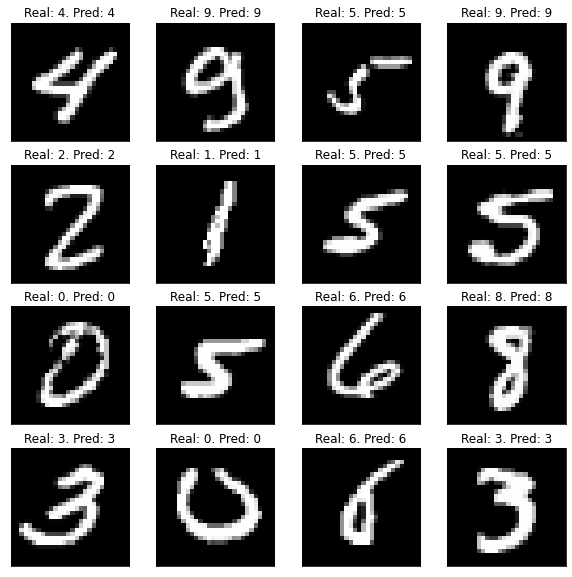

In [ ]:
predicted_labels = restored_model.predict_classes(Xv)
idxs = np.random.choice(np.arange(len(Xv)), 16, replace=False)
show_mnist(Xv[idxs].reshape((-1, 28, 28)), Yv[idxs], predicted_labels[idxs])

### Теперь часть с TensorRT

In [9]:
tf.saved_model.save(model, "./drive/My Drive/models/model_mnist/saved_model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./drive/My Drive/models/model_mnist/saved_model/assets


In [11]:
from tensorflow.python.compiler.tensorrt import trt_convert as trt
converter = trt.TrtGraphConverterV2(input_saved_model_dir='./drive/My Drive/models/model_mnist/saved_model')
converter.convert()
converter.save('./drive/My Drive/models/model_mnist/saved_model_trt')

INFO:tensorflow:Linked TensorRT version: (0, 0, 0)
INFO:tensorflow:Loaded TensorRT version: (0, 0, 0)
INFO:tensorflow:Assets written to: ./drive/My Drive/models/model_mnist/saved_model_trt/assets


In [22]:
model1 = keras.models.load_model("./drive/My Drive/models/model_mnist/saved_model")
model2 = keras.models.load_model("./drive/My Drive/models/model_mnist/saved_model_trt")

In [27]:
Xvv = tf.cast(Xv[:100], tf.float32)   #Кастуем к ожидаемому tf типу, иначе он СЛИШКОМ КАПРИЗНЫЙ И НЕ ХОЧЕТ РАБОТАТЬ СО ВТОРОЙ МОДЕЛЬЮ

In [28]:
%%timeit -n 10 -r 10

preds = model1(Xvv)

10 loops, best of 10: 3.62 ms per loop


In [29]:
%%timeit -n 10 -r 10

preds = model2(Xvv)

10 loops, best of 10: 2.87 ms per loop
